In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch


In [2]:
import warnings
warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd

import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from gensim.models import Word2Vec 

In [41]:
#basic cleaning
import time

#data = data.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"})
#data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]

#nltk.download('stopwords')

#stop = set(stopwords.words('english'))

#removing spaces and stopwords
import re
# function to clean data
def clean_data(X):
    temp =[]
    snow = nltk.stem.SnowballStemmer('english')
    start = time.time()
    for i, sentence in enumerate(X):
        if i%10000 == 0:
            print(i, 'Time taken:', time.time()-start)
            start = time.time()
        sentence = sentence.lower()                 # Converting to lowercase
        cleanr = re.compile('<.*?>')
        sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
        sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
        sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations

        words = [snow.stem(word) for word in sentence.split()]   # Stemming
        temp.append(words)

    X = temp    

    sent = []
    for row in X:
        sequ = ''
        for word in row:
            sequ = sequ + ' ' + word
        sent.append(sequ)

    return sent

In [3]:
cleaned_data = pd.read_csv("C:/Users/micha/Downloads/cleaned_data.csv")

In [24]:
X, y = cleaned_data['Text'], cleaned_data['Score']

<AxesSubplot:>

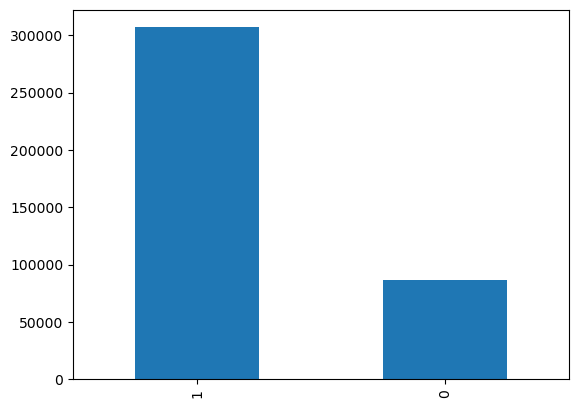

In [133]:
y.value_counts().plot(kind='bar')

In [134]:
X = np.array(X)
y = np.array(y)

In [5]:
print(type(X))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Train Val Test Splitting


In [13]:
from sklearn.model_selection import train_test_split

def bal_split(X,y):
    # Split the data into training and testing sets (70-30 split)
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



    # Split the remaining data into training and validation sets (50-50 split)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)


    # Balance the VALIDATION set
    positive_val_indices = np.where(y_val == 1)[0]
    negative_val_indices = np.where(y_val == 0)[0]
    np.random.seed(42)
    positive_val_indices = np.random.choice(positive_val_indices, size=1000, replace=False)
    negative_val_indices = np.random.choice(negative_val_indices, size=1000, replace=False)
    X_val_balanced = np.concatenate((X_val[positive_val_indices], X_val[negative_val_indices]), axis=0)
    y_val_balanced = np.concatenate((np.ones(1000), np.zeros(1000)))

    return X_train, X_val_balanced, X_test, y_train, y_val_balanced, y_test



# Print the size and distribution of each set
print("Size of training set:", len(X_train))
print("Distribution of labels in training set:")
print(pd.Series(y_train).value_counts())
print()
print("Size of test set:", len(X_test))
print("Distribution of labels in validation set:")
print(pd.Series(y_test).value_counts())
print()
print("Size of balanced val set:", len(X_val_balanced))
print("Distribution of labels in balanced test set:")
print(pd.Series(y_val_balanced).value_counts())


KeyError: '[6240, 103101, 132012, 118346, 69678, 88065, 77283, 67678, 11370, 119636, 103058, 84350, 127436, 82990, 48312, 26324, 3711, 44976, 10303, 11962, 131641, 45099, 81899, 107770, 42312, 17753, 74373, 49704, 52256, 70211, 45685, 126593, 65367, 63933, 82366, 126367, 20829, 125395, 95147, 39374, 20359, 77745, 115421, 83684, 97041, 22449, 107053, 89064, 128864, 96635, 112664, 11635, 94570, 80720, 119419, 21796, 79041, 130782, 76993, 41201, 66625, 58450, 27695, 122371, 6787, 99336, 106295, 32975, 27402, 39926, 2721, 65128, 99464, 55611, 58617, 39928, 37133, 128457, 62765, 93617, 75491, 107562, 22642, 88431, 32381, 125915, 12183, 74898, 120600, 15992, 65734, 60435, 108560, 117120, 116485, 111626, 13633, 7476, 70581, 7023, 96693, 2479, 72222, 64377, 124719, 110532, 48584, 31094, 93922, 58788, 97901, 107225, 83495, 134209, 24437, 23667, 77749, 94509, 61308, 53613, 101388, 52441, 69710, 15713, 70751, 135790, 19296, 23377, 31911, 48282, 11155, 19377, 34810, 29628, 81882, 96308, 42238, 84278, 17713, 46880, 131277, 33572, 18124, 127190, 12489, 130445, 5210, 28592, 88614, 75006, 128809, 54442, 88386, 67049, 114195, 23330, 70278, 62949, 119173, 19384, 53207, 115040, 127569, 10461, 101602, 100471, 126351, 81693, 32782, 53885, 74919, 121867, 55905, 102024, 3993, 83428, 92480, 45167, 113042, 111441, 86933, 5479, 44140, 96713, 111536, 75007, 62210, 20633, 120394, 15590, 95545, 51741, 93583, 66047, 108218, 126642, 10653, 21672, 29692, 128655, 101506, 23308, 130077, 54804, 119995, 109993, 56207, 29064, 131872, 109288, 81027, 72431, 61262, 58947, 123157, 107943, 55620, 50157, 73943, 119915, 125663, 100445, 64864, 56401, 109366, 3404, 16200, 68142, 107690, 77879, 134736, 88323, 41639, 125071, 68500, 115670, 39804, 109456, 116360, 125325, 97307, 2374, 74410, 19042, 1888, 88486, 64791, 14474, 13136, 22836, 81230, 59115, 80840, 96049, 46580, 89783, 84183, 18888, 131491, 113246, 74715, 111745, 63313, 126606, 96523, 91601, 56708, 29696, 72578, 115728, 122441, 53889, 108927, 47063, 8090, 50323, 58381, 55263, 93263, 13252, 105345, 85622, 17292, 91011, 56599, 70739, 136859, 117521, 20985, 76304, 120348, 124855, 76414, 43209, 47851, 42518, 17877, 7286, 80329, 132290, 47538, 22376, 28340, 134690, 74734, 10627, 85419, 32691, 121802, 136610, 72203, 87782, 96291, 118125, 7703, 87233, 87505, 49032, 92602, 108366, 45697, 95329, 79785, 51505, 591, 48657, 98897, 71537, 95203, 21179, 34519, 79410, 85572, 56454, 35373, 27223, 81261, 38050, 72515, 136432, 59906, 26678, 23490, 36764, 92264, 1401, 136232, 136367, 75801, 127997, 84566, 27533, 130556, 122144, 6114, 68929, 67108, 112109, 53966, 27993, 137147, 58773, 26137, 20256, 131393, 89962, 130007, 22848, 119737, 35837, 9339, 11050, 70144, 46135, 13938, 59899, 29586, 31388, 81225, 32421, 61145, 33947, 102080, 33726, 135959, 23673, 81922, 2195, 72696, 22830, 78899, 57282, 38148, 67822, 68114, 53717, 9784, 5627, 32814, 68395, 38467, 44483, 18543, 88516, 50027, 89028, 30684, 71647, 22197, 61974, 21673, 45502, 93934, 64241, 74004, 60100, 74862, 60168, 34126, 132299, 31363, 122670, 45633, 43808, 26514, 71706, 49810, 16181, 46403, 101457, 19506, 101309, 43299, 52601, 79569, 106259, 37709, 111329, 28945, 91207, 114993, 80271, 97552, 114901, 9596, 38964, 10844, 95678, 57943, 132117, 64707, 116856, 34824, 54399, 57302, 14651, 72664, 37706, 51786, 106300, 33929, 127889, 11870, 108109, 122105, 66616, 81110, 130250, 19595, 86324, 99768, 6506, 127551, 69863, 75195, 20394, 106420, 111489, 91399, 91208, 72535, 11213, 54316, 36138, 50799, 81561, 87348, 45914, 137048, 70225, 134345, 7322, 37663, 53965, 17584, 4681, 106054, 5964, 88082, 7773, 57874, 12783, 69322, 28131, 35654, 82277, 435, 42510, 20952, 106626, 22530, 102456, 126668, 122445, 117612, 115357, 6896, 47698, 77856, 47559, 14715, 32450, 53777, 96717, 124596, 132050, 40406, 83009, 18987, 38071, 76073, 137030, 44555, 47971, 1744, 134727, 121848, 14184, 71794, 10239, 36225, 114078, 127760, 93060, 40574, 13327, 107352, 49271, 9454, 78348, 3971, 14330, 69324, 83052, 129167, 97558, 14645, 97484, 70049, 46633, 87065, 93671, 20846, 10825, 9323, 9405, 40004, 119013, 114428, 12045, 85157, 92281, 31398, 77054, 53347, 126837, 122671, 76362, 49978, 97755, 27341, 85268, 10550, 117515, 108397, 73712, 7893, 70950, 32702, 15996, 91233, 830, 111734, 121951, 85437, 137808, 99613, 129486, 126453, 14242, 135650, 98973, 57520, 41957, 127303, 43683, 119353, 55573, 11174, 120117, 5815, 46554, 83167, 238, 31018, 121797, 52966, 126800, 103948, 86817, 41262, 42058, 134780, 122725, 119833, 42653, 55349, 83965, 112190, 15937, 88731, 75176, 21071, 58509, 100256, 40626, 5461, 86240, 53760, 6426, 17485, 104717, 79803, 62224, 80267, 88843, 13885, 110863, 99062, 122601, 111379] not in index'

# Completely Naive BoW with Logistic Regression


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Convert text data to bag of words representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.3, random_state=42)

#Prediction
lr_naive = LogisticRegression()
lr_naive.fit(X_train, y_train)

# Test the model on the testing dataset
y_pred = lr_naive.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

#88.4% out of the box accuracy on regular data 

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Convert text data to bag of words representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, train_size = .7, test_size=0.01, random_state=42)

# Calculate frequency of each class in the training set
class_freq = np.unique(y_train, return_counts=True)

# Split testing set into two parts, one for each class
pos_idx = np.where(y_test == 1)[0]
neg_idx = np.where(y_test == 0)[0]

pos_test_set = X_test[pos_idx]
neg_test_set = X_test[neg_idx]

pos_test_set = pos_test_set.toarray()
neg_test_set = neg_test_set.toarray()

# Combine the two testing sets to create a balanced testing set
min_len = min(pos_test_set.shape[0], neg_test_set.shape[0])

balanced_X_test = np.concatenate((pos_test_set[:min_len], neg_test_set[:min_len]))
balanced_y_test = np.concatenate((np.ones(min_len), np.zeros(min_len)))

# Shuffle the examples in the balanced testing set
shuffle_idx = np.random.permutation(len(balanced_y_test))
balanced_X_test = balanced_X_test[shuffle_idx]
balanced_y_test = balanced_y_test[shuffle_idx]

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Test the model on the testing dataset
y_pred = lr.predict(balanced_X_test)

y_pred_naive = lr_naive.predict(balanced_X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(balanced_y_test, y_pred)
accuracy_naive = accuracy_score(balanced_y_test, y_pred_naive)



#Accuracy 81% on balanced panel 

In [77]:
print(pd.Series(balanced_y_test).value_counts())
print(f"Accuracy: {accuracy:.3f}")
print(f"Naive Accuracy: {accuracy_naive:.3f}")



1.0    862
0.0    862
dtype: int64
Accuracy: 0.810
Naive Accuracy: 0.804


In [69]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.3, random_state=42)
accuracy = lr.score (X_test,y_test)
print('Accuracy on random sample: {:.2f}%'.format(accuracy * 100))

#89% accuracy on random sample 

Accuracy on random sample: 89.58%


# With Boosting


In [84]:
import xgboost as xgb
from xgboost import XGBClassifier

# Train a logistic regression model using XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {'objective': 'binary:logistic'}
xgb_bow = xgb.train(params, dtrain, num_boost_round=1000, early_stopping_rounds=10, evals=[(dtest, 'test')])

# Make predictions on test set
y_pred = xgb_bow.predict(dtest)

# Evaluate performance
from sklearn.metrics import accuracy_score
print('Accuracy on entire thing:', accuracy_score(y_test, y_pred.round()))

dbalance = xgb.DMatrix(balanced_X_test,label = balanced_y_test)

# Predict on the balanced test set
y_pred_balanced = xgb_bow.predict(dbalance)

# Evaluate the predictions
print('Accuracy on balanced part:', accuracy_score(balanced_y_test, y_pred_balanced.round()))


[0]	test-logloss:0.58410
[1]	test-logloss:0.52431
[2]	test-logloss:0.48875
[3]	test-logloss:0.46518
[4]	test-logloss:0.44845
[5]	test-logloss:0.43597
[6]	test-logloss:0.42539
[7]	test-logloss:0.41787
[8]	test-logloss:0.41111
[9]	test-logloss:0.40497
[10]	test-logloss:0.39932
[11]	test-logloss:0.39470
[12]	test-logloss:0.38928
[13]	test-logloss:0.38553
[14]	test-logloss:0.38167
[15]	test-logloss:0.37752
[16]	test-logloss:0.37365
[17]	test-logloss:0.37069
[18]	test-logloss:0.36773
[19]	test-logloss:0.36498
[20]	test-logloss:0.36281
[21]	test-logloss:0.36031
[22]	test-logloss:0.35754
[23]	test-logloss:0.35540
[24]	test-logloss:0.35408
[25]	test-logloss:0.35234
[26]	test-logloss:0.35038
[27]	test-logloss:0.34849
[28]	test-logloss:0.34648
[29]	test-logloss:0.34345
[30]	test-logloss:0.34244
[31]	test-logloss:0.34082
[32]	test-logloss:0.33863
[33]	test-logloss:0.33703
[34]	test-logloss:0.33516
[35]	test-logloss:0.33441
[36]	test-logloss:0.33348
[37]	test-logloss:0.33218
[38]	test-logloss:0.33

In [88]:
X

0          i have bought sever of the vital can dog food...
1          product arriv label as jumbo salt peanut the ...
2          this is a confect that has been around a few ...
3          if you are look for the secret ingredi in rob...
4          great taffi at a great price there was a wide...
                                ...                        
393912     great for sesam chicken this is a good if not...
393913     im disappoint with the flavor the chocol note...
393914     these star are small so you can give 10-15 of...
393915     these are the best treat for train and reward...
393916     i am veri satisfi product is as advertis i us...
Name: Text, Length: 393917, dtype: object

In [91]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

X_trainval, X_test, y_trainval, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=42, stratify=y_trainval)

# Define a grid of hyperparameters to search over
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [5, 7],
    'n_estimators': [200],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Create an XGBoost classifier object
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False)

# Perform grid search using cross-validation on the training set
grid_search = GridSearchCV(xgb, param_grid, cv=3, verbose = 2)
grid_search.fit(X_train, y_train)

for i in range(len(grid_search.cv_results_['params'])):
    print("Params:", grid_search.cv_results_['params'][i])
    print("Mean test score:", grid_search.cv_results_['mean_test_score'][i])
    print("Standard deviation of test score:", grid_search.cv_results_['std_test_score'][i])
    print("----------------------------")

# Evaluate the best hyperparameters on the validation set
best_xgb_bow = grid_search.best_estimator_
y_val_pred = best_xgb_bow.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

# Test the final model on the test set
y_test_pred = best_xgb_bow.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

# Print the best hyperparameters and their score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)




Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=0.5; total time=  16.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=0.5; total time=  17.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=0.5; total time=  17.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=0.75; total time=  16.5s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=0.75; total time=  16.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0, subsample=0.75; total time=  16.4s
[CV] END colsample_bytree=

KeyboardInterrupt: 

# TF-IDF with BOOSTING


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

final_tf = cleaned_data['Text']
tf_idf = TfidfVectorizer(max_features=1000)
tf_data = tf_idf.fit_transform(final_tf)
tf_data.shape

(393917, 1000)

In [26]:
temp = tf_data.toarray() # turning sparse matrix into dense matrix

Initial Run

In [10]:
from sklearn.model_selection import train_test_split
import xgboost as xgb


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(temp, y, train_size = .7, test_size=0.01, random_state=42)

# Calculate frequency of each class in the training set
class_freq = np.unique(y_train, return_counts=True)

# Split testing set into two parts, one for each class
pos_idx = np.where(y_test == 1)[0]
neg_idx = np.where(y_test == 0)[0]

pos_test_set = X_test[pos_idx]
neg_test_set = X_test[neg_idx]

# Combine the two testing sets to create a balanced testing set
min_len = min(pos_test_set.shape[0], neg_test_set.shape[0])

balanced_X_test = np.concatenate((pos_test_set[:min_len], neg_test_set[:min_len]))
balanced_y_test = np.concatenate((np.ones(min_len), np.zeros(min_len)))

# Shuffle the examples in the balanced testing set
shuffle_idx = np.random.permutation(len(balanced_y_test))
balanced_X_test = balanced_X_test[shuffle_idx]
balanced_y_test = balanced_y_test[shuffle_idx]

# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train XGBoost classifier on training data
xgb_clf.fit(X_train, y_train)

# Evaluate XGBoost classifier on test data
accuracy = xgb_clf.score(balanced_X_test, balanced_y_test)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

#accuracy 74.83% on the initial run for a balanced panel 


Accuracy: 74.83%


In [38]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(temp, y, test_size=0.3, random_state=42)
accuracy = xgb_clf.score (X_test,y_test)
print('Accuracy on random sample: {:.2f}%'.format(accuracy * 100))

#89% accuracy on random sample 

Accuracy on random sample: 89.11%


With Parameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(temp, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=42, stratify=y_trainval)

# Define a grid of hyperparameters to search over
param_grid = {
    #'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    #'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2],
    #'reg_alpha': [0, 0.1, 0.5],
    #'reg_lambda': [0, 0.1, 0.5]
}

# Create an XGBoost classifier object
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False)

# Perform grid search using cross-validation on the training set
grid_search = GridSearchCV(xgb, param_grid, cv=2)
grid_search.fit(X_train, y_train)

# Evaluate the best hyperparameters on the validation set
best_xgb = grid_search.best_estimator_
y_val_pred = best_xgb.predict(X_val)
val_acc = best_xgb.score(y_val, y_val_pred)

# Test the final model on the test set
y_test_pred = best_xgb.predict(X_test)
test_acc = best_xgb.score(y_test, y_test_pred)

# Print the best hyperparameters and their score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

#87.4% accuracy w 0.75 colsample by tree, max depth o f7 and 200 estimators, subsample 1, gamma 0, alpha 0, lambda 1
#takes an entire hour 


In [18]:
# Evaluate the best hyperparameters on the validation set
best_xgb = grid_search.best_estimator_
y_val_pred = best_xgb.predict(X_val)
val_acc = best_xgb.score(y_val, y_val_pred)

# Test the final model on the test set
y_test_pred = best_xgb.predict(X_test)
test_acc = best_xgb.score(y_test, y_test_pred)

# Print the best hyperparameters and their score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 0.75, 'max_depth': 7, 'n_estimators': 200}
Best score: 0.8739259391682477


In [37]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(temp, y, train_size = .7, test_size=0.01, random_state=42)

# Calculate frequency of each class in the training set
class_freq = np.unique(y_train, return_counts=True)

# Split testing set into two parts, one for each class
pos_idx = np.where(y_test == 1)[0]
neg_idx = np.where(y_test == 0)[0]

pos_test_set = X_test[pos_idx]
neg_test_set = X_test[neg_idx]

# Combine the two testing sets to create a balanced testing set
min_len = min(pos_test_set.shape[0], neg_test_set.shape[0])

balanced_X_test = np.concatenate((pos_test_set[:min_len], neg_test_set[:min_len]))
balanced_y_test = np.concatenate((np.ones(min_len), np.zeros(min_len)))

# Shuffle the examples in the balanced testing set
shuffle_idx = np.random.permutation(len(balanced_y_test))
balanced_X_test = balanced_X_test[shuffle_idx]
balanced_y_test = balanced_y_test[shuffle_idx]

# Test the model on the testing dataset
y_pred = best_xgb.predict(balanced_X_test)

# Calculate evaluation metrics
accuracy = np.mean(y_pred == balanced_y_test)

print(accuracy)

0.8387470997679815


In [39]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(temp, y, test_size=0.3, random_state=42)
accuracy = best_xgb.score (X_test,y_test)
print('Accuracy on random sample: {:.2f}%'.format(accuracy * 100))

#91.19% accuracy on random sample 

Accuracy on random sample: 91.19%


In [65]:
sentence = ["I do not know"]
clean_sentence = clean_data(sentence)
print(clean_sentence)
sparse = tf_idf.transform(clean_sentence)

sparse = sparse.toarray()

prob = best_xgb.predict_proba(sparse)
print(type(prob))
print(f'Probability of a positive review is {prob[0][1]}')

0 Time taken: 0.0
[' i do not know']
<class 'numpy.ndarray'>
Probability of a positive review is 0.2703675627708435


# W2V

In [16]:
import pandas as pd
import numpy as np
import gensim
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [44]:
#Training W2V Model
sentences = [gensim.utils.simple_preprocess(text) for text in cleaned_data['Text']]
model = gensim.models.Word2Vec(sentences=sentences, vector_size=300, window=5, min_count=1, workers=4)

#takes around a minute or so 


In [45]:
#Text encoding
def encode_text(text):
    words = gensim.utils.simple_preprocess(text)
    vecs = [model.wv[word] for word in words if word in model.wv]
    if len(vecs) > 0:
        return np.mean(vecs, axis=0)
    else:
        return np.zeros(model.vector_size)

cleaned_data['encoded_text'] = cleaned_data['Text'].apply(encode_text)

#takes about a minute or so 


In [48]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data['encoded_text'], y, test_size=0.3, random_state=42)

#Model
xg_train = xgb.DMatrix(np.array(list(X_train)), label=y_train)
xg_test = xgb.DMatrix(np.array(list(X_test)), label=y_test)
param = {'max_depth': 7, 'eta': 0.15, 'objective': 'binary:logistic'}
xgb_w2v = xgb.train(param, xg_train, num_boost_round=100)


#model eval
y_pred = xgb_w2v.predict(xg_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')


#86.5% accuracy wahhh

Accuracy: 0.8651502843216897


In [74]:
xg_test = xgb.DMatrix(np.array(list(test_df['Text'])), label=test_df['Score'])


ValueError: Please reshape the input data into 2-dimensional matrix.

In [78]:
test_df['encoded_text']

319409    [0.2580548, -0.095952146, 0.22290576, 0.094422...
50116     [0.2708252, -0.15965064, 0.28282544, 0.1543303...
324296    [0.17068242, 0.23078741, 0.23908558, -0.323772...
41693     [0.5475419, -0.2107918, -0.026301779, 0.034036...
27294     [0.26602906, -0.08991946, 0.060180604, 0.06457...
                                ...                        
108307    [0.20781834, 0.23939013, 0.36853963, -0.145921...
371197    [0.4338081, 0.040465835, 0.14736585, 0.1748648...
47798     [0.19281393, 0.20094402, 0.22531913, 0.2747895...
82089     [0.28207597, 0.08878692, 0.3718162, -0.0342229...
21047     [-0.06931823, 0.20355266, -0.020673422, 0.1815...
Name: encoded_text, Length: 2000, dtype: object

In [77]:
#try 50/50
X_train, X_test, y_train, y_test = train_test_split(test_df['encoded_text'], test_df['Score'], test_size=0.2, random_state=42, stratify=y)

# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train XGBoost classifier on training data
xgb_clf.fit(X_train, y_train)

# Evaluate XGBoost classifier on test data
accuracy = xgb_clf.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

ValueError: Found input variables with inconsistent numbers of samples: [2000, 393917]

In [39]:
#XGBOOST

for param_value in [4,5,6,7,8]: 
    #Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(cleaned_data['encoded_text'], y, test_size=0.3, random_state=42)

    #Model
    xg_train = xgb.DMatrix(np.array(list(X_train)), label=y_train)
    xg_test = xgb.DMatrix(np.array(list(X_test)), label=y_test)
    param = {'max_depth': param_value, 'eta': 0.15, 'objective': 'binary:logistic'}
    model = xgb.train(param, xg_train, num_boost_round=100)


    #model eval
    y_pred = model.predict(xg_test)
    y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
    accuracy = np.mean(y_pred == y_test)
    print(f'Param Value: {param_value} Accuracy: {accuracy}')


#as this model gets more complex, we actually see it get better.... 



Param Value: 4 Accuracy: 0.8505449499052261
Param Value: 5 Accuracy: 0.8539720417005144
Param Value: 6 Accuracy: 0.8564683184402925
Param Value: 7 Accuracy: 0.8577291497427566
Param Value: 8 Accuracy: 0.8597515569997293


In [38]:
#model eval for 10-D W2V embeddings
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data['encoded_text_10'], y, test_size=0.3, random_state=42)
#Model
xg_train = xgb.DMatrix(np.array(list(X_train)), label=y_train)
xg_test = xgb.DMatrix(np.array(list(X_test)), label=y_test)
param = {'max_depth': 6, 'eta': 0.3, 'objective': 'binary:logistic','lambda': 1}
model = xgb.train(param, xg_train)

y_pred = model.predict(xg_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

#default params, depth 6 eta 0.3, lambda = 1
#vector size 10 
#80% accurate 


Accuracy: 0.8001455456268616


In [54]:
X_np = X.to_numpy()

In [55]:
X_np

array([array([ 3.05501968e-01, -9.62868929e-02,  3.21318805e-01, -2.11178456e-02,
               4.50601093e-02, -2.59613663e-01, -8.91744047e-02, -1.06418058e-01,
              -4.09026854e-02,  2.54805923e-01, -9.31983292e-02, -1.80127602e-02,
              -2.19290316e-01,  5.22617340e-01,  8.09774026e-02,  3.86451989e-01,
               1.11205347e-01,  1.63718328e-01,  3.55907828e-01, -5.27243614e-02,
              -2.08552629e-01, -5.06018877e-01, -5.92609942e-02,  1.06266290e-01,
              -5.21547683e-02, -7.90234134e-02, -1.75521359e-01,  4.61480886e-01,
              -3.20887506e-01, -7.33172847e-03, -5.59408128e-01, -1.92320675e-01,
              -3.20619553e-01,  5.95456481e-01,  1.90435514e-01,  1.41120061e-01,
              -1.68033279e-02, -1.34337038e-01,  3.44929814e-01,  3.95025939e-01,
               2.07313076e-01, -1.77934989e-01, -1.59556866e-01,  6.82880804e-02,
               1.68053225e-01, -3.42262387e-01,  1.01048037e-01,  1.70407668e-01,
              -1

In [56]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# define your data and labels
X = X_np
y = y

# define the parameter space to search over
param_dist = {
    'learning_rate': np.arange(0.05, 0.31, 0.05),
    'max_depth': np.arange(6,10, 1),
    'subsample': np.arange(0.5, 1.0, 0.1)
}

# create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# create a random search object
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=5,  # number of iterations
    cv=3,  # number of cross-validation folds
    scoring='accuracy',  # evaluation metric
    n_jobs=-1,  # use all available CPUs
    verbose=3  # display progress messages
)

# run the random search
random_search.fit(X, y)

# print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best ROC AUC score:", random_search.best_score_)



Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\micha\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\micha\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1471, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "c:\Users\micha\anaconda3\lib\site-packages

ValueError: Please reshape the input data into 2-dimensional matrix.

In [ ]:
#tuning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

# Define X and y
X = cleaned_data['encoded_text']
y = y

# Define parameter grid
param_grid = {
    'max_depth': [3, 4, 5,6],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300]
}

# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Define GridSearchCV object
grid_search = GridSearchCV(
    xgb_clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)

# Fit GridSearchCV object to data
grid_search.fit(X, y)

# Print best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


# N-Grams


This shit runs out of memory oops

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Encode documents using 2-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))
encoded_documents = vectorizer.fit_transform(cleaned_data['Text'])


# Define CountVectorizer with n-gram range
vectorizer = CountVectorizer(ngram_range=(1,2))

# Fit and transform text data
X = vectorizer.fit_transform(cleaned_data['Text'])

# Convert sparse matrix to array
X = np.array(X.toarray())

# Print feature names
print(vectorizer.get_feature_names())


MemoryError: Unable to allocate 7.19 TiB for an array with shape (393917, 2508978) and data type int64

In [ ]:
#XGBOOST4
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Define X and y
X = X
y = y

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train XGBoost classifier on training data
xgb_clf.fit(X_train, y_train)

y_pred = model.predict(xg_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8597515569997293


# Glove


In [ ]:
#for this one I don't think we can stem ... 

In [47]:
from gensim.models import KeyedVectors

# Load GloVe embeddings
glove_model = KeyedVectors.load_word2vec_format('/path/to/glove.6B.100d.txt', binary=False)

# Get embedding vector for a word
embedding_vector = glove_model['word']


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/glove.6B.100d.txt'